In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
import os
import tifffile
import sys

os.environ['MOMAPS_HOME'] = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
sys.path.insert(1, os.getenv('MOMAPS_HOME'))
from src.common.lib.image_metrics import improve_brightness

In [2]:
raw_image_path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch6/WT/panelD/Untreated/rep2/PSD95/R11_w3confCy5_s396.tif"

with tifffile.TiffFile(raw_image_path) as tif:
    metadata = tif.pages[0].tags
    site_pixel_size_in_um = metadata.get('UIC1tag').value['XCalibration']

tile_pixel_size_in_um = site_pixel_size_in_um * 1.28


In [9]:
SAVE_PATH = "./manuscript/fig5/panelH"

In [34]:
def plot_tiles_panelH(path, tile_indexes, colormap, tile_pixel_size_in_um, filename, 
              tile_scalebar_length_in_um=5, contrast_factor = 1, brightness_factor = 0.1, plot_scale=False):
    site = np.load(path)
    # fig = plt.figure(figsize=(100/127,100/127), dpi=127) #100/dpi,100/dpi
    fig, axs = plt.subplots(2,2, figsize=(200/127, 200/127), dpi=127)
    for i, tile_index in enumerate(tile_indexes):
        brightness_adjusted = improve_brightness(img=site[tile_index, :, :, 0], contrast_factor=contrast_factor, 
                                                 brightness_factor=brightness_factor)
        axs[i//2, i%2].imshow(brightness_adjusted, cmap=colormap,vmin=0, vmax=1)
        axs[i//2, i%2].axis('off')
        axs[i//2, i%2].margins = (0,0)
        if i==2 and plot_scale:
            tile_scalebar_length_in_pixels = tile_scalebar_length_in_um / tile_pixel_size_in_um
            axs[i//2, i%2].hlines(y=90, xmin=85-tile_scalebar_length_in_pixels, xmax=85, color='white', linewidth=2)
    # plt.text(y = 87.5, x = 85-tile_scalebar_length_in_pixels, 
    #          s=f"{tile_scalebar_length_in_um} \u03BCm", fontsize=4, color='white')
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    # plt.tight_layout()
    plt.savefig(filename, dpi=127, bbox_inches='tight', pad_inches=0)
    # plt.show()

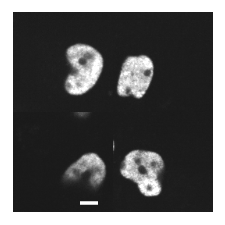

In [35]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/WT/Untreated/FUS/rep2_R11_w2confmCherry_s312_panelG_WT_processed.npy"
plot_tiles_panelH(path, [1,5,7,12], 'gray', tile_pixel_size_in_um, 
                 filename=os.path.join(SAVE_PATH, f"WT_FUS_marker.eps"),
                 tile_scalebar_length_in_um=5, contrast_factor = 1, brightness_factor = 0.1, plot_scale = True)

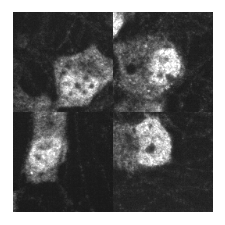

In [44]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/FUSHomozygous/Untreated/FUS/rep2_R11_w2confmCherry_s992_panelG_FUSHomozygous_processed.npy"
plot_tiles_panelH(path, [4,6,11,15], 'gray', tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, f"FUSHomozygous_FUS_marker.eps"), tile_scalebar_length_in_um=5, 
              contrast_factor = 1, brightness_factor = 0.1)


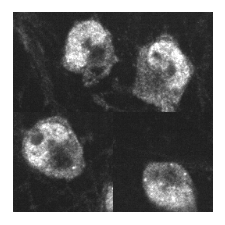

In [46]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/FUSHeterozygous/Untreated/FUS/rep1_R11_w2confmCherry_s1237_panelG_FUSHeterozygous_processed.npy"
plot_tiles_panelH(path, [4,5,6,10], 'gray', tile_pixel_size_in_um, 
                  filename=os.path.join(SAVE_PATH, f"FUSHeterozygous_FUS_marker.eps"), tile_scalebar_length_in_um=5, 
              contrast_factor = 1, brightness_factor = 0.1)

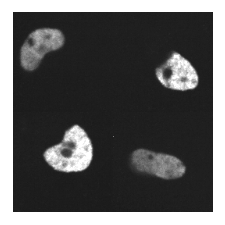

In [48]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/FUSRevertant/Untreated/FUS/rep1_R11_w2confmCherry_s1403_panelG_FUSRevertant_processed.npy"
plot_tiles_panelH(path, [2,3,6,15], 'gray', tile_pixel_size_in_um, 
                  filename=os.path.join(SAVE_PATH, f"FUSRevertant_FUS_marker.eps"), tile_scalebar_length_in_um=5, 
              contrast_factor = 1, brightness_factor = 0.1)


In [38]:
def plot_tile(path, tile_index, colormap, tile_pixel_size_in_um, filename, tile_scalebar_length_in_um=5, contrast_factor = 1, brightness_factor = 0.1):
    site = np.load(path)

    # Adjust contrast and brightness
    brightness_adjusted = improve_brightness(img=site[tile_index, :, :, 0], contrast_factor=contrast_factor, brightness_factor=brightness_factor)
    
    fig = plt.figure(figsize=(100/127,100/127), dpi=127) #100/dpi,100/dpi
    plt.imshow(brightness_adjusted, cmap=colormap,vmin=0, vmax=1)
    plt.axis('off')
    plt.margins = (0,0)
    tile_scalebar_length_in_pixels = tile_scalebar_length_in_um / tile_pixel_size_in_um
    plt.hlines(y=90, xmin=85-tile_scalebar_length_in_pixels, xmax=85, color='white', linewidth=2)
    # plt.text(y = 87.5, x = 85-tile_scalebar_length_in_pixels, 
    #          s=f"{tile_scalebar_length_in_um} \u03BCm", fontsize=4, color='white')
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    # plt.savefig(filename, dpi=127, bbox_inches='tight', pad_inches=0)
    plt.show()